In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

05/16/2018 19:18:06 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 19:18:08 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/16/2018 19:18:09 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


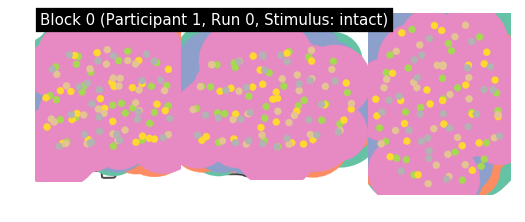

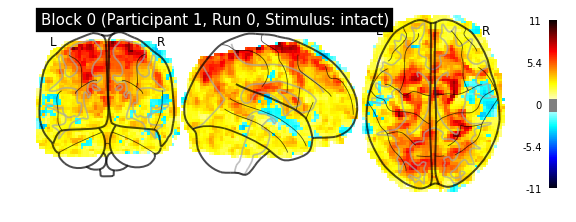

05/16/2018 19:20:13 Reconstruction Error (Frobenius Norm): 5.62245020e+03 out of 5.08479639e+03


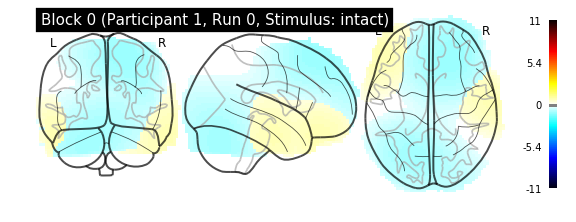

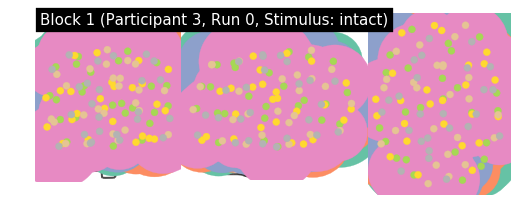

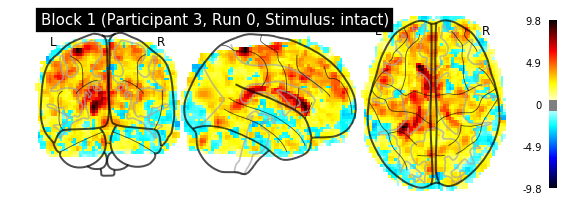

05/16/2018 19:20:39 Reconstruction Error (Frobenius Norm): 5.72261719e+03 out of 5.19534277e+03


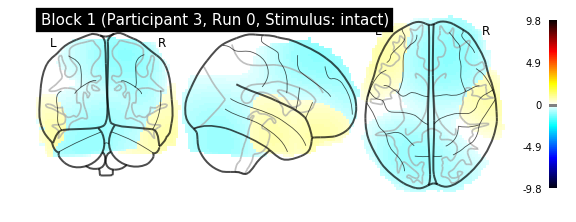

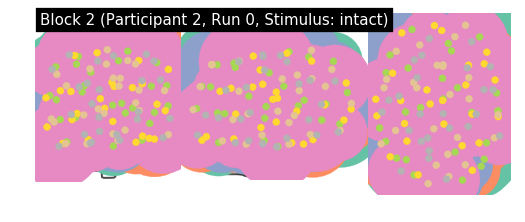

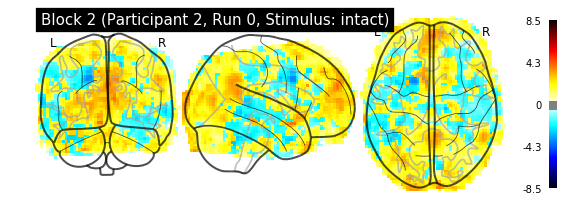

05/16/2018 19:21:06 Reconstruction Error (Frobenius Norm): 5.72261816e+03 out of 5.19534277e+03


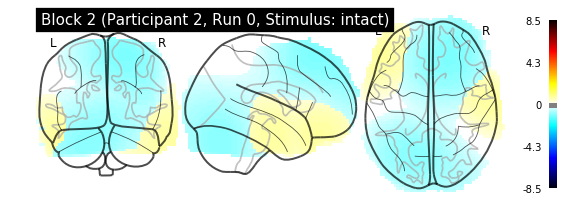

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [7]:
losses = dtfa.train(num_steps=500, learning_rate=5e-3, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8, patience=20)

05/16/2018 19:21:07 [Epoch 1] (1042ms) Posterior free-energy 1.51728390e+11
05/16/2018 19:21:07 Saving checkpoint...
05/16/2018 19:21:08 [Epoch 2] (888ms) Posterior free-energy 2.15013376e+10
05/16/2018 19:21:09 [Epoch 3] (893ms) Posterior free-energy 1.85967677e+10
05/16/2018 19:21:10 [Epoch 4] (889ms) Posterior free-energy 8.19274803e+09
05/16/2018 19:21:11 [Epoch 5] (887ms) Posterior free-energy 4.30193152e+09
05/16/2018 19:21:11 [Epoch 6] (886ms) Posterior free-energy 3.43152461e+09
05/16/2018 19:21:12 [Epoch 7] (887ms) Posterior free-energy 3.03253504e+09
05/16/2018 19:21:13 [Epoch 8] (894ms) Posterior free-energy 2.92042547e+09
05/16/2018 19:21:14 [Epoch 9] (917ms) Posterior free-energy 2.84818970e+09
05/16/2018 19:21:15 [Epoch 10] (894ms) Posterior free-energy 2.82535117e+09
05/16/2018 19:21:16 [Epoch 11] (892ms) Posterior free-energy 2.80839834e+09
05/16/2018 19:21:16 Saving checkpoint...
05/16/2018 19:21:17 [Epoch 12] (895ms) Posterior free-energy 2.79840742e+09
05/16/2018 19:

Epoch   272: reducing learning rate of group 0 to 5.0000e-04.


05/16/2018 19:25:13 [Epoch 274] (896ms) Posterior free-energy 2.59754701e+09
05/16/2018 19:25:14 [Epoch 275] (889ms) Posterior free-energy 2.59757773e+09
05/16/2018 19:25:15 [Epoch 276] (898ms) Posterior free-energy 2.59695616e+09
05/16/2018 19:25:16 [Epoch 277] (918ms) Posterior free-energy 2.59803674e+09
05/16/2018 19:25:17 [Epoch 278] (896ms) Posterior free-energy 2.59669171e+09
05/16/2018 19:25:18 [Epoch 279] (900ms) Posterior free-energy 2.59763712e+09
05/16/2018 19:25:19 [Epoch 280] (892ms) Posterior free-energy 2.59577267e+09
05/16/2018 19:25:20 [Epoch 281] (892ms) Posterior free-energy 2.59843738e+09
05/16/2018 19:25:20 Saving checkpoint...
05/16/2018 19:25:21 [Epoch 282] (896ms) Posterior free-energy 2.59755878e+09
05/16/2018 19:25:22 [Epoch 283] (889ms) Posterior free-energy 2.59765965e+09
05/16/2018 19:25:22 [Epoch 284] (890ms) Posterior free-energy 2.59831910e+09
05/16/2018 19:25:23 [Epoch 285] (889ms) Posterior free-energy 2.59757107e+09
05/16/2018 19:25:24 [Epoch 286] (89

Epoch   300: reducing learning rate of group 0 to 5.0000e-05.


05/16/2018 19:25:39 [Epoch 302] (899ms) Posterior free-energy 2.59665229e+09
05/16/2018 19:25:39 [Epoch 303] (893ms) Posterior free-energy 2.59784986e+09
05/16/2018 19:25:40 [Epoch 304] (895ms) Posterior free-energy 2.59624832e+09
05/16/2018 19:25:41 [Epoch 305] (891ms) Posterior free-energy 2.59702579e+09
05/16/2018 19:25:42 [Epoch 306] (889ms) Posterior free-energy 2.59761818e+09
05/16/2018 19:25:43 [Epoch 307] (888ms) Posterior free-energy 2.59763738e+09
05/16/2018 19:25:44 [Epoch 308] (885ms) Posterior free-energy 2.59639168e+09
05/16/2018 19:25:45 [Epoch 309] (885ms) Posterior free-energy 2.59742848e+09
05/16/2018 19:25:46 [Epoch 310] (885ms) Posterior free-energy 2.59689088e+09
05/16/2018 19:25:47 [Epoch 311] (891ms) Posterior free-energy 2.59688730e+09
05/16/2018 19:25:47 Saving checkpoint...
05/16/2018 19:25:47 [Epoch 312] (890ms) Posterior free-energy 2.59830195e+09
05/16/2018 19:25:48 [Epoch 313] (888ms) Posterior free-energy 2.59642138e+09
05/16/2018 19:25:49 [Epoch 314] (88

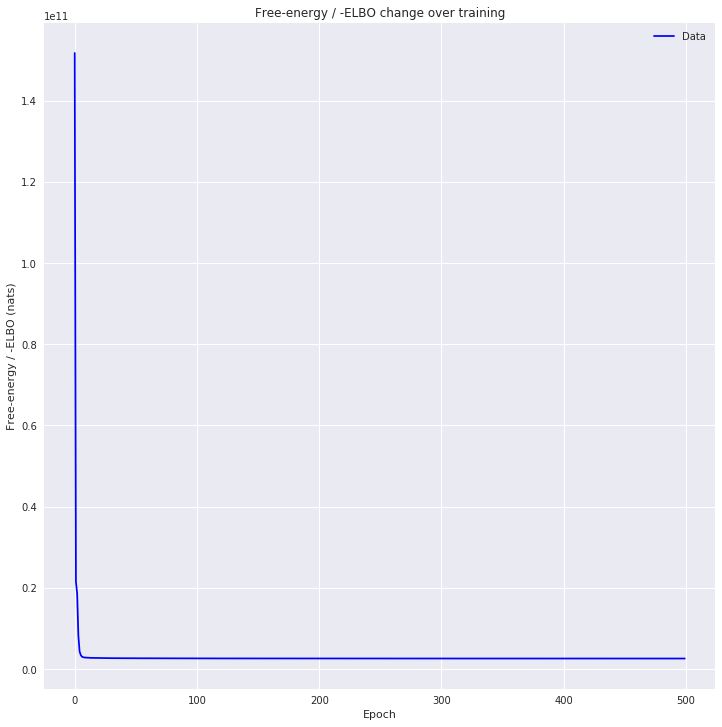

In [8]:
utils.plot_losses(losses)

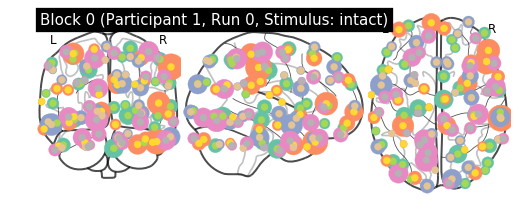

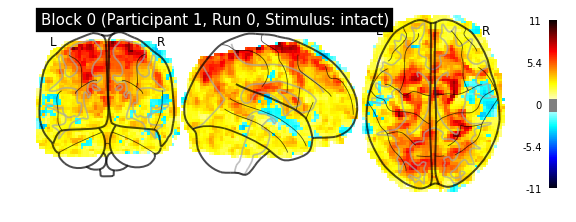

05/16/2018 19:29:02 Reconstruction Error (Frobenius Norm): 5.08501416e+03 out of 5.08479639e+03


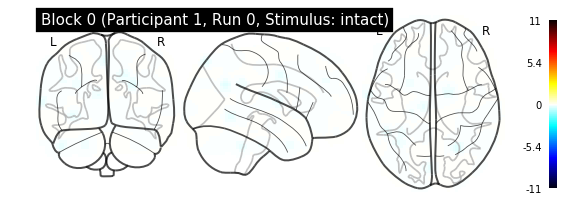

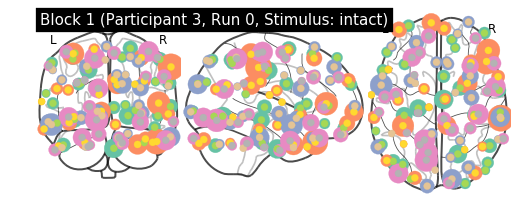

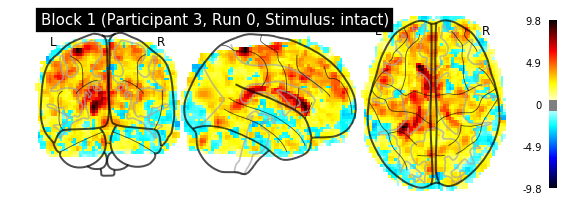

05/16/2018 19:29:29 Reconstruction Error (Frobenius Norm): 5.19536816e+03 out of 5.19534277e+03


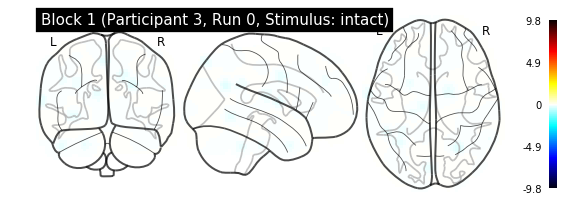

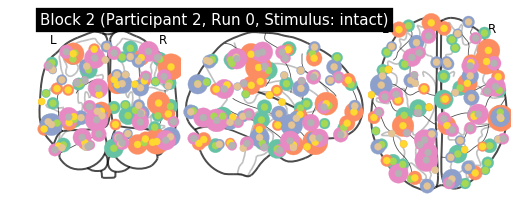

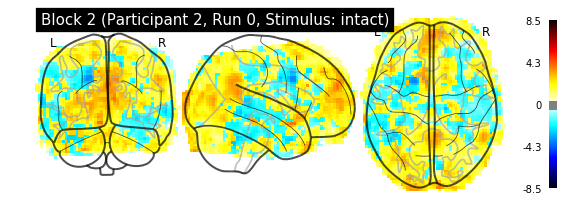

05/16/2018 19:29:56 Reconstruction Error (Frobenius Norm): 5.19524072e+03 out of 5.19534277e+03


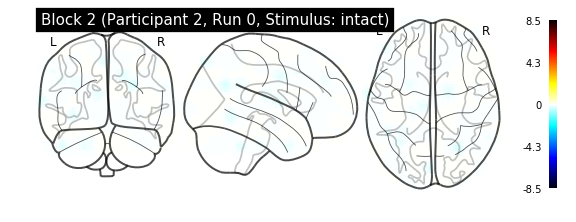

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


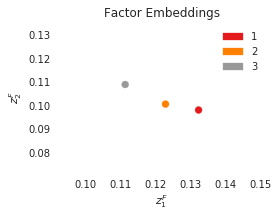

In [11]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


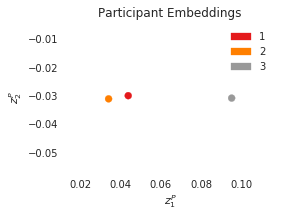

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


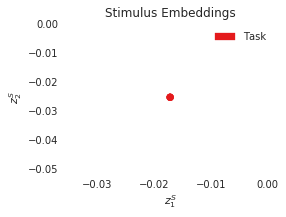

In [12]:
dtfa.scatter_task_embedding(t=None, labeler=task_rest_labeler)